In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [19]:
df = pd.read_csv('datasets//tmdb_cleaned.csv', index_col=0)

In [20]:
df.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_count,Profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,11800,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,4500,661000000
2,245000000,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...",en,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B']","['GB', 'United Kingdom', 'US', 'United States ...",2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,4466,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",en,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros', 'DC Ente...","['US', 'United States of America']",2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,9106,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",en,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"['US', 'United States of America']",2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,2124,24139100


In [21]:
# show the data types of each column
df.dtypes

budget                    int64
genres                   object
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
tagline                  object
title                    object
vote_count                int64
Profit                    int64
dtype: object

In [22]:
# change release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

### All columns has the right data types now

### Let's group the column into categorical and numerical column

In [23]:
cat_cols = df.select_dtypes(exclude=[np.number])
num_cols = df.select_dtypes(include=[np.number])

In [24]:
# All the categorical columns
cat_cols.head(2)

,genres,keywords,original_language,overview,production_companies,production_countries,release_date,tagline,title
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...","['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit...",2009-12-10,Enter the World of Pandora.,Avatar
1,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']",2007-05-19,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End


In [25]:
# All the Qualitative columns
num_cols.head(2)

,budget,popularity,revenue,runtime,vote_count,Profit
0,237000000,150.437577,2787965087,162.0,11800,2550965087
1,300000000,139.082615,961000000,169.0,4500,661000000


In [26]:
#Let's check if there's still any missing values
df.isna().sum()

budget                  0
genres                  0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
tagline                 0
title                   0
vote_count              0
Profit                  0
dtype: int64

There's no missing value. Now let's start

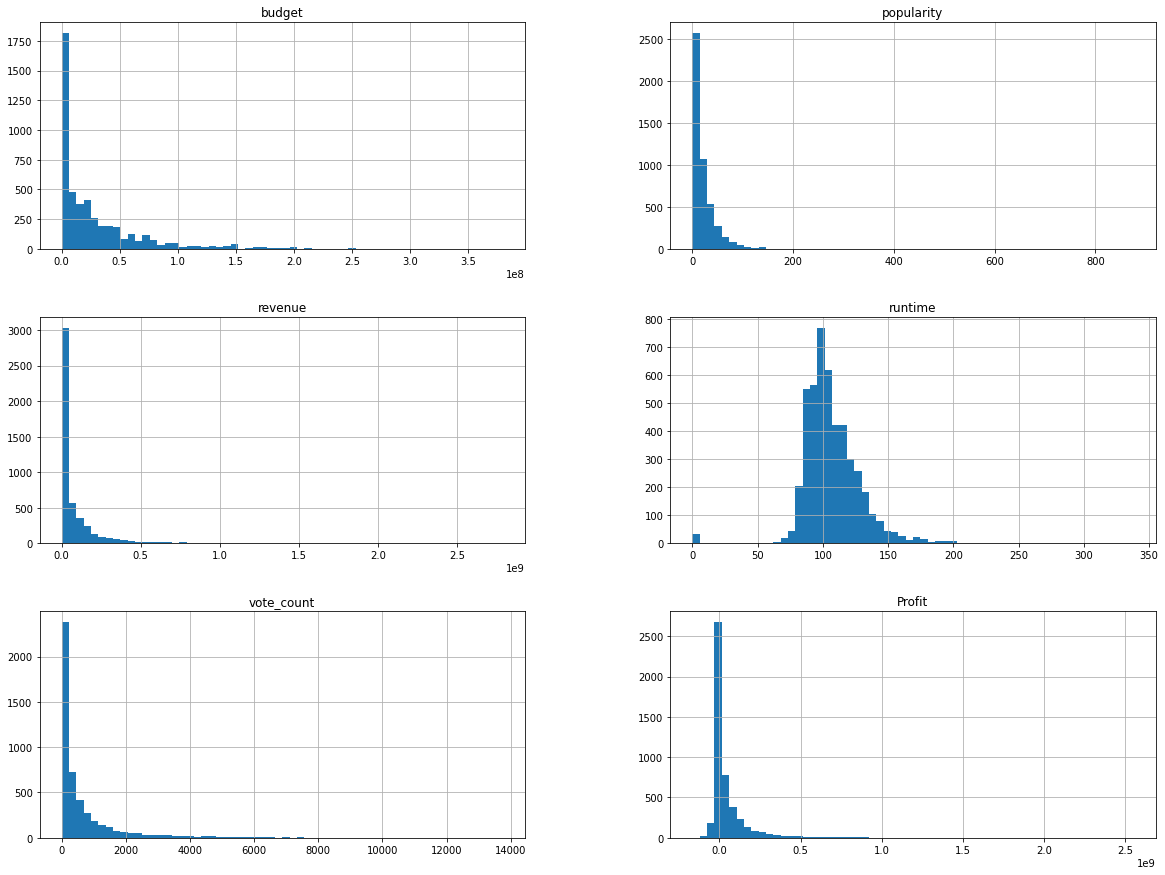

In [27]:
# multi-variate Analysis
num_cols.hist(bins=60, figsize=(20,15));

## Conclusion: Some relatively few number of movies have a higher budget than the rest. Almost all the movies have a rating score of less than 200 although there's an unseen outliers. There's a symmetrical distribution on the runtime column, with the mean centred around 110 min. Majority of the movies have a Profit of less than 1 Billion.

In [28]:
df.corr()

,budget,popularity,revenue,runtime,vote_count,Profit
budget,1.000000,0.505250,0.730764,0.269684,0.593071,0.575782
popularity,0.505250,1.000000,0.644631,0.225265,0.778066,0.620782
revenue,0.730764,0.644631,1.000000,0.251112,0.781437,0.978881
runtime,0.269684,0.225265,0.251112,1.000000,0.271955,0.220000
vote_count,0.593071,0.778066,0.781437,0.271955,1.000000,0.758338
Profit,0.575782,0.620782,0.978881,0.220000,0.758338,1.000000


## There's a correlation between budget and revenue. The higher the budget, the higher the revenue, even though not always. There is also a correlation between Popularity and vote count. that makes sense. since the more popular a movie is, the more likely more people will vote/rate it. revenue and profit also correlates with popularity. That makes sense also. the more popular a movie is, the more revenue it will generate and thus profit. There is a close to perfect correlation between revenue and profit. 

## Let's visualize the correlation

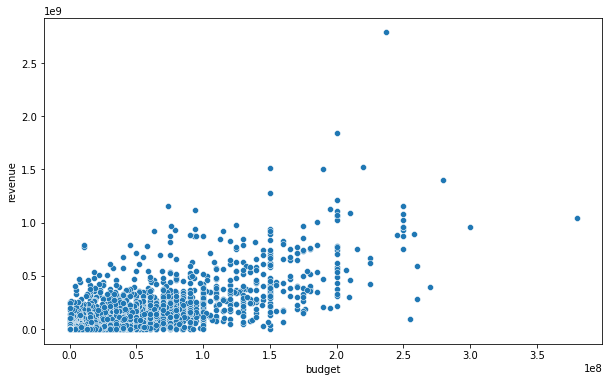

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df);

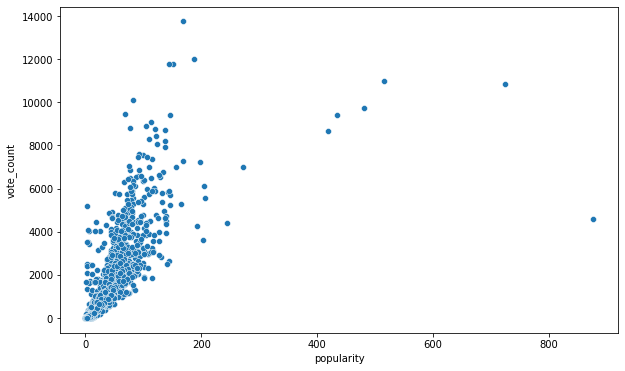

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_count', data=df);

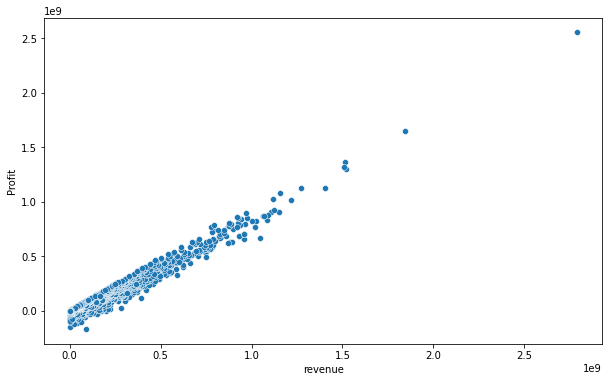

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revenue', y='Profit', data=df);

## Univariate Analysis

In [32]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')

Bar Chart for genres column


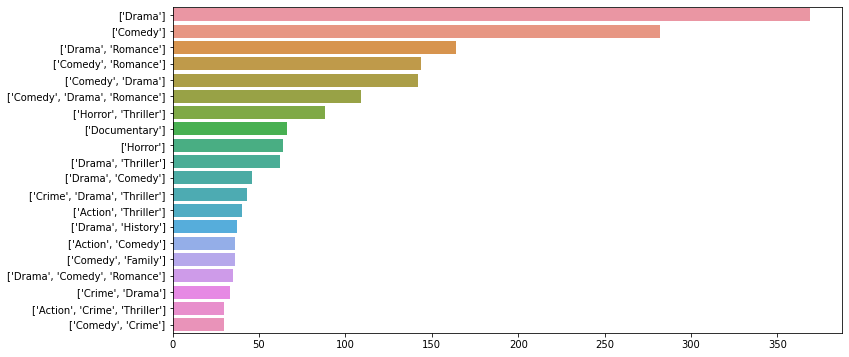

Bar Chart for keywords column


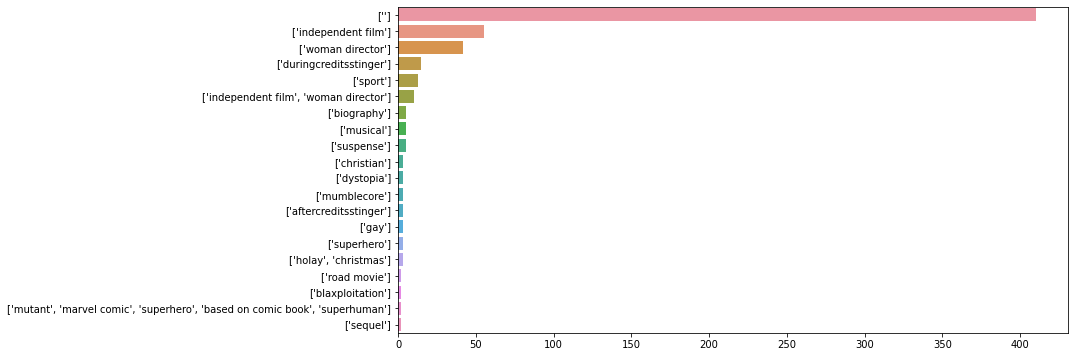

Bar Chart for original_language column


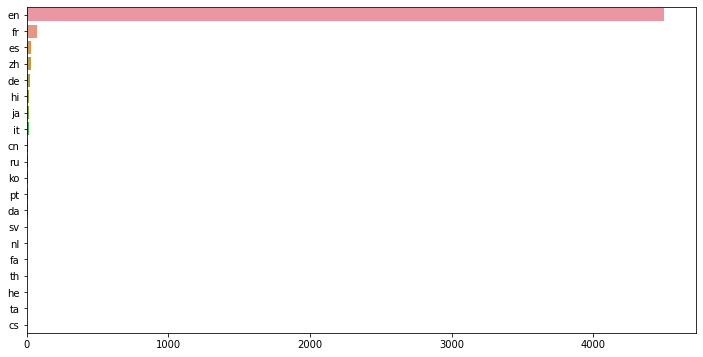

Bar Chart for production_companies column


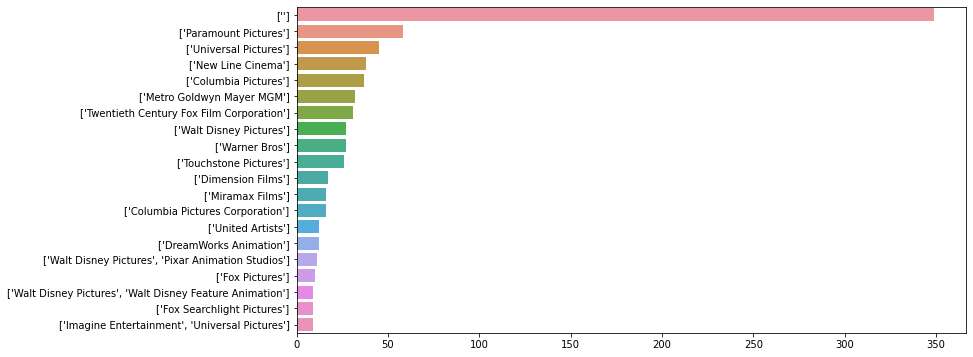

Bar Chart for production_countries column


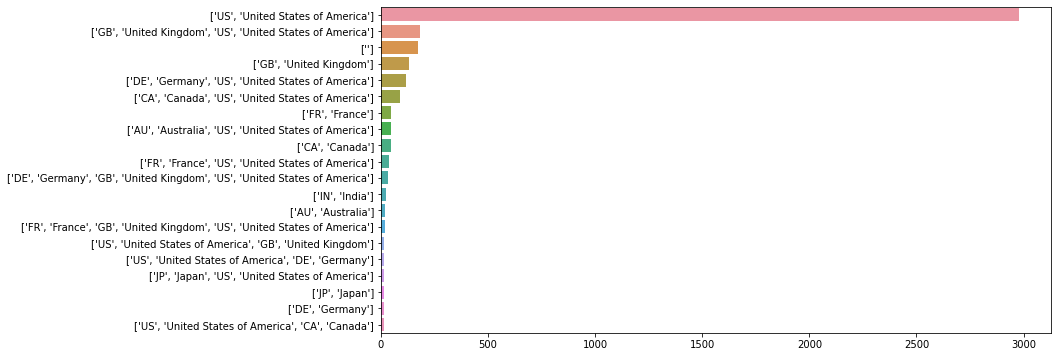

In [33]:
for col in cat_cols[['genres', 'keywords', 'original_language', 'production_companies', 'production_countries']].columns:
    val_cnt = cat_cols[col].value_counts()[:20]
    print(f'Bar Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.barplot(x=val_cnt.values, y=val_cnt.index)
    plt.show()

## CONCLUSION: Drama is the most most common genre followed by Comedy. Most movies are independent film. Almost all the movies' original language is English. Paramount Pictures and Universal Pictures appear the most in Production Companies. Close to 3K movies are made in the United States Alone. 

Boxplot Chart for budget column


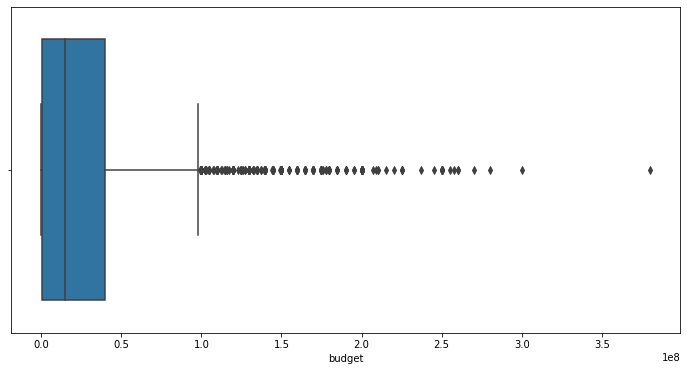

Boxplot Chart for popularity column


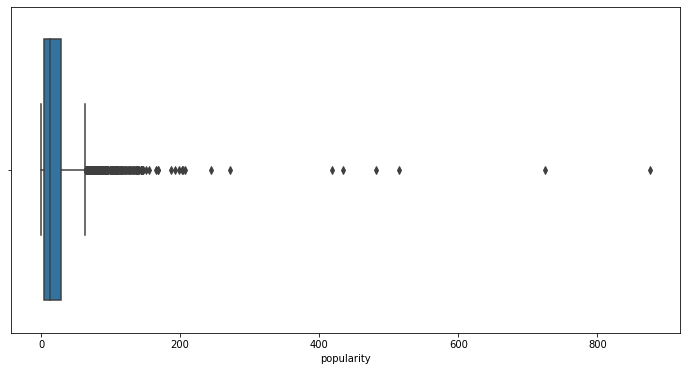

Boxplot Chart for revenue column


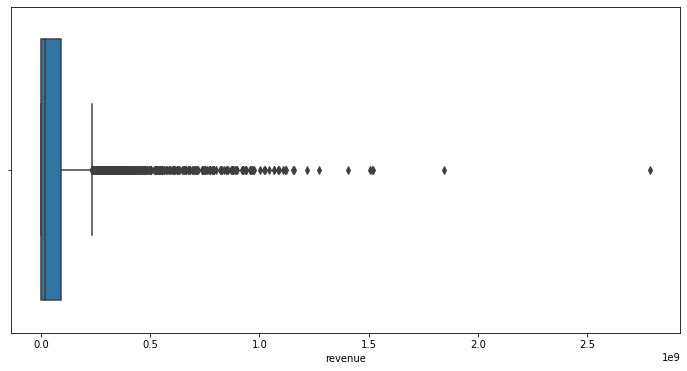

Boxplot Chart for runtime column


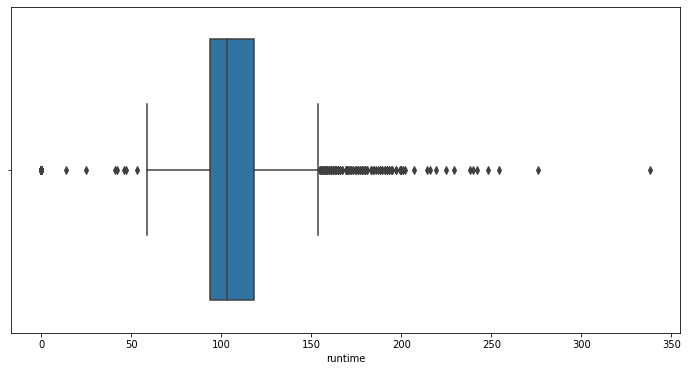

Boxplot Chart for vote_count column


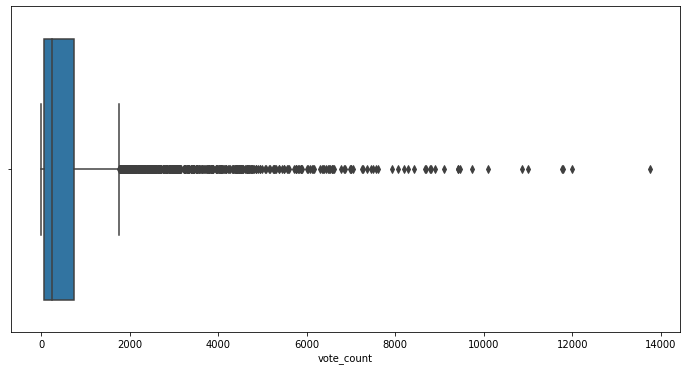

Boxplot Chart for Profit column


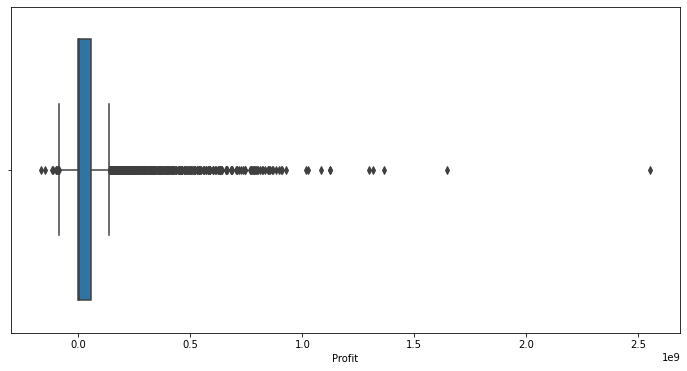

In [34]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Boxplot Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.boxplot(x=num_cols[col]);
    plt.show();

## The maximum value for the Budget column (excluding outliers) is around 100 Million. The rest (100+M - 350M) are outliers. The median is 15M. Lots of outliers in Popularity, vote count, revenue and profit columns. The median for revenue column is 19M. 

Density Plot for budget column


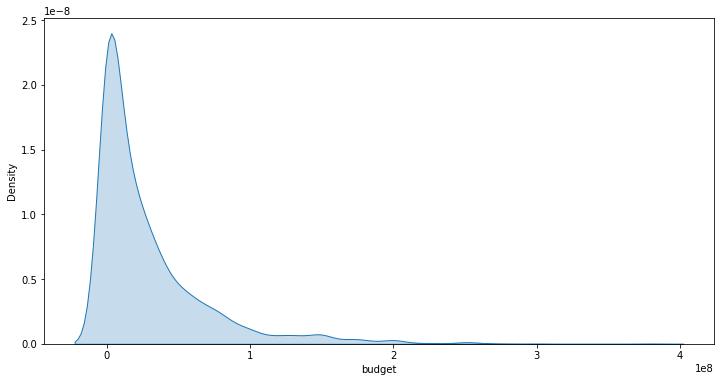

Density Plot for popularity column


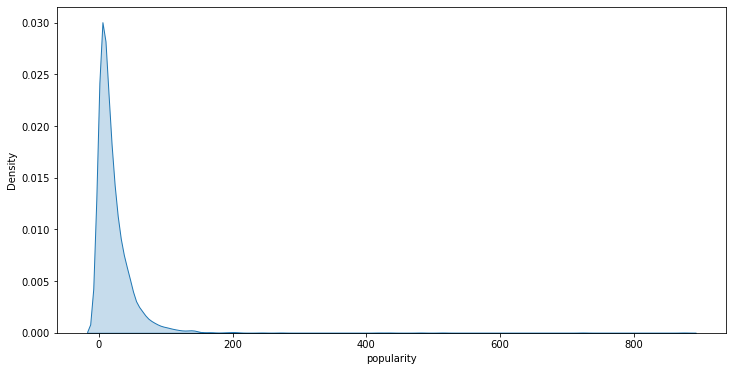

Density Plot for revenue column


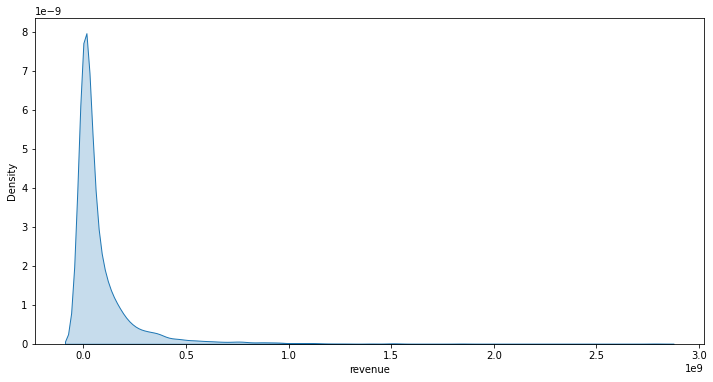

Density Plot for runtime column


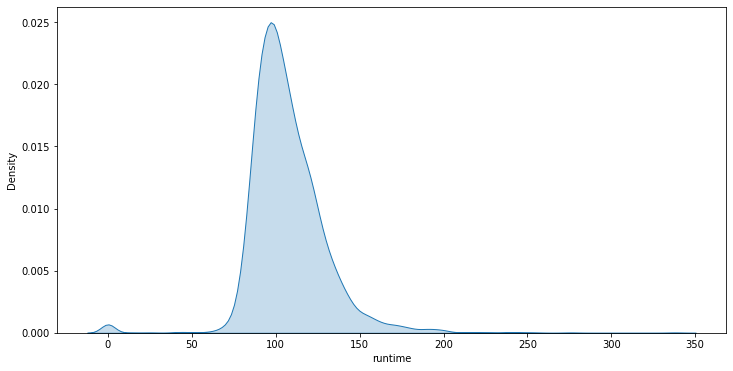

Density Plot for vote_count column


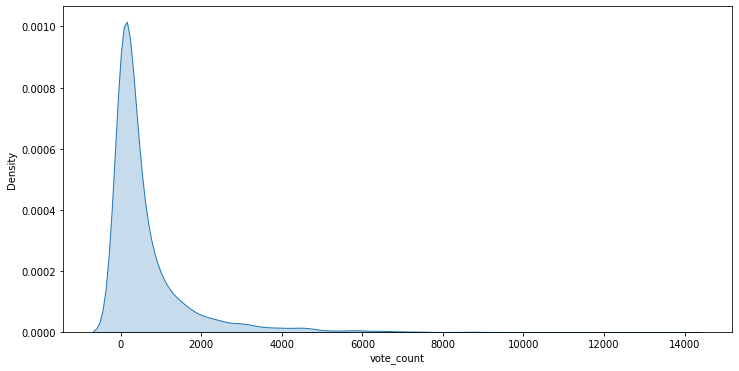

Density Plot for Profit column


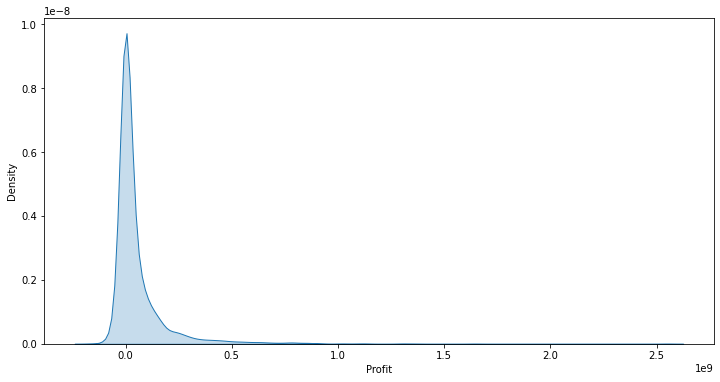

In [35]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Density Plot for {col} column')
    plt.figure(figsize=(12,6))
    sns.kdeplot(x=num_cols[col], shade=True);
    plt.show();

In [36]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')

## The Top 5 spenders (highest budget)

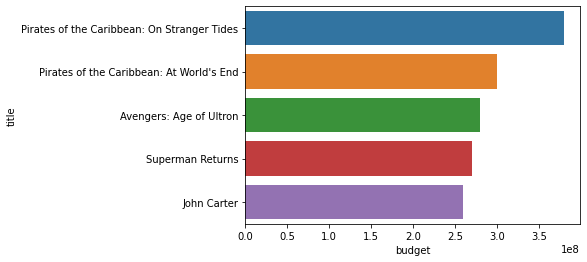

In [37]:
t = df.loc[df.budget.sort_values(ascending=False).head().index]
sns.barplot(y=t['title'], x=t['budget']);

## The Top 10 Earners (highest profit)

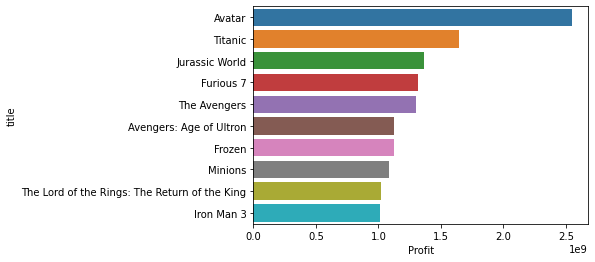

In [38]:
p = df.loc[df.Profit.sort_values(ascending=False).head(10).index]
sns.barplot(y=p['title'], x=p['Profit']);

## of the top five spenders (highest budget), only one (Avengers: Age of ultrons. Positioned at no 6) make it to the list of the top 10 MOST PROFITABLE.

## now let's see the genres. production companies and production countries of the highest spenders

In [39]:
t[['title', 'genres', 'production_companies', 'production_countries']]

,title,genres,production_companies,production_countries
17,Pirates of the Caribbean: On Stranger Tides,"['Adventure', 'Action', 'Fantasy']","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']"
1,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['US', 'United States of America']"
7,Avengers: Age of Ultron,"['Action', 'Adventure', 'Science Fiction']","['Marvel Studios', 'Prime Focus', 'Revolution ...","['US', 'United States of America']"
10,Superman Returns,"['Adventure', 'Fantasy', 'Action', 'Science Fi...","['DC Comics', 'Legendary Pictures', 'Warner Br...","['US', 'United States of America']"
4,John Carter,"['Action', 'Adventure', 'Science Fiction']",['Walt Disney Pictures'],"['US', 'United States of America']"


## CONCLUSION: All of the highest spenders are made in the United States only. The most common genres for the movies are Action and adventure. All of them have similar genres. Walt disney Picture appears in three movies out of the five. Now let's see the highest earners.

In [40]:
p[['title', 'genres', 'production_companies', 'production_countries']]

,title,genres,production_companies,production_countries
0,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Ingenious Film Partners', 'Twentieth Century...","['US', 'United States of America', 'GB', 'Unit..."
25,Titanic,"['Drama', 'Romance', 'Thriller']","['Paramount Pictures', 'Twentieth Century Fox ...","['US', 'United States of America']"
28,Jurassic World,"['Action', 'Adventure', 'Science Fiction', 'Th...","['Universal Studios', 'Amblin Entertainment', ...","['US', 'United States of America']"
44,Furious 7,['Action'],"['Universal Pictures', 'Original Film', 'Fuji ...","['JP', 'Japan', 'US', 'United States of America']"
16,The Avengers,"['Science Fiction', 'Action', 'Adventure']","['Paramount Pictures', 'Marvel Studios']","['US', 'United States of America']"
7,Avengers: Age of Ultron,"['Action', 'Adventure', 'Science Fiction']","['Marvel Studios', 'Prime Focus', 'Revolution ...","['US', 'United States of America']"
124,Frozen,"['Animation', 'Adventure', 'Family']","['Walt Disney Pictures', 'Walt Disney Animatio...","['US', 'United States of America']"
546,Minions,"['Family', 'Animation', 'Adventure', 'Comedy']","['Universal Pictures', 'Illumination Entertain...","['US', 'United States of America']"
329,The Lord of the Rings: The Return of the King,"['Adventure', 'Fantasy', 'Action']","['WingNut Films', 'New Line Cinema']","['NZ', 'New Zealand', 'US', 'United States of ..."
31,Iron Man 3,"['Action', 'Adventure', 'Science Fiction']",['Marvel Studios'],"['CN', 'China', 'US', 'United States of America']"


## Both the highest spenders and the highest earnears have similar genres, with Action, adventure, Fantasy and Science Fiction being the most common. Marvel Studios appears in three out of ten movies, while Walt Disney Pictures appear once even though it produces three movies in highest spenders

 ### let's add a column to calculate the percentage of budget in revenue

In [41]:
p['percent'] = np.round((p['budget'] / p['revenue']) * 100)
p[['title', 'percent']]

,title,percent
0,Avatar,9.0
25,Titanic,11.0
28,Jurassic World,10.0
44,Furious 7,13.0
16,The Avengers,14.0
7,Avengers: Age of Ultron,20.0
124,Frozen,12.0
546,Minions,6.0
329,The Lord of the Rings: The Return of the King,8.0
31,Iron Man 3,16.0


## "Minions" spends 6% of its revenue on budget. "The Lord of the Rings: The Return of the King" spends 8%. And "Avatar" spends 9%. Let's see the highest spenders

In [42]:
t['percent'] = np.round((t['budget'] / t['revenue']) * 100)
t[['title', 'percent']]

,title,percent
17,Pirates of the Caribbean: On Stranger Tides,36.0
1,Pirates of the Caribbean: At World's End,31.0
7,Avengers: Age of Ultron,20.0
10,Superman Returns,69.0
4,John Carter,92.0


## "John Carter" - 92% of it's revenue goes to budget. that is a lot. 

## Let's see the most common genres combined in the dataset

In [43]:
from collections import Counter

def extend_and_count(col):
    upper = []
    for row in col:
        upper.extend(eval(row))
    return Counter(upper)

In [44]:
genres = extend_and_count(df['genres'])

In [45]:
genres.most_common(5)

[('Drama', 2296),
 ('Comedy', 1722),
 ('Thriller', 1274),
 ('Action', 1154),
 ('Romance', 894)]

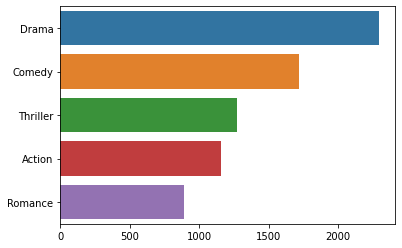

In [46]:
sns.barplot(y=[genre for genre, count in genres.most_common(5)], x=[count for genre, count in genres.most_common(5)]);

## it turns out that Drama and Comedy is the most popular genres, not Action and Adventures.

In [47]:
prod_com = extend_and_count(df['production_companies'])

In [48]:
del prod_com[""]
prod_com.most_common(10)

[('Warner Bros', 319),
 ('Universal Pictures', 311),
 ('Paramount Pictures', 285),
 ('Twentieth Century Fox Film Corporation', 222),
 ('Columbia Pictures', 201),
 ('New Line Cinema', 165),
 ('Metro Goldwyn Mayer MGM', 122),
 ('Touchstone Pictures', 118),
 ('Walt Disney Pictures', 114),
 ('Relativity Media', 102)]

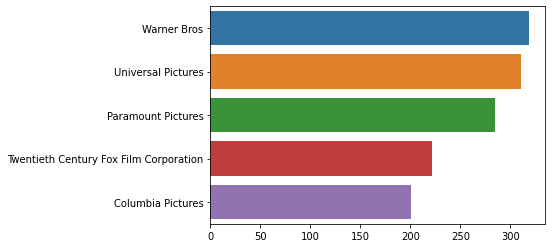

In [49]:
sns.barplot(y=[com for com, count in prod_com.most_common(5)], x=[count for com, count in prod_com.most_common(5)]);

# -----------------------------------------------------------------------------------------------------